# **Employee Performance Prediction**

In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing The Models in Sciket-Learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
import lightgbm as lgb

# Importing Usefull Operators in Sciket-Learn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
import xgboost as xgb



In [347]:
df_train= pd.read_csv("train_dataset.csv")
df_test= pd.read_csv("test_dataset.csv")

pd.set_option('display.max_columns', None)
df_train.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.00,0,0,8.00,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.76
1,7,0.65,30.10,909.00,7080,0,0.00,0,1,59.00,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0.54
2,3,0.80,4.15,NaN,1440,0,0.00,0,0,7.00,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.82
3,1,0.65,22.53,762.00,5040,0,0.00,0,1,42.00,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0.58
4,4,0.70,30.10,767.00,3300,50,0.00,0,1,57.00,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0.79


In [348]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [349]:
df_train.isnull().sum()

team                       0
targeted_productivity      0
smv                        0
wip                      423
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
month                      0
quarter_Quarter1           0
quarter_Quarter2           0
quarter_Quarter3           0
quarter_Quarter4           0
quarter_Quarter5           0
department_finishing       0
department_finishing       0
department_sweing          0
day_Monday                 0
day_Saturday               0
day_Sunday                 0
day_Thursday               0
day_Tuesday                0
day_Wednesday              0
actual_productivity        0
dtype: int64

In [350]:
df_train["wip"]=df_train["wip"].fillna(df_train["wip"].mean()) 

In [351]:
df_train.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
actual_productivity      0
dtype: int64

Checking for any Correlation

<AxesSubplot:>

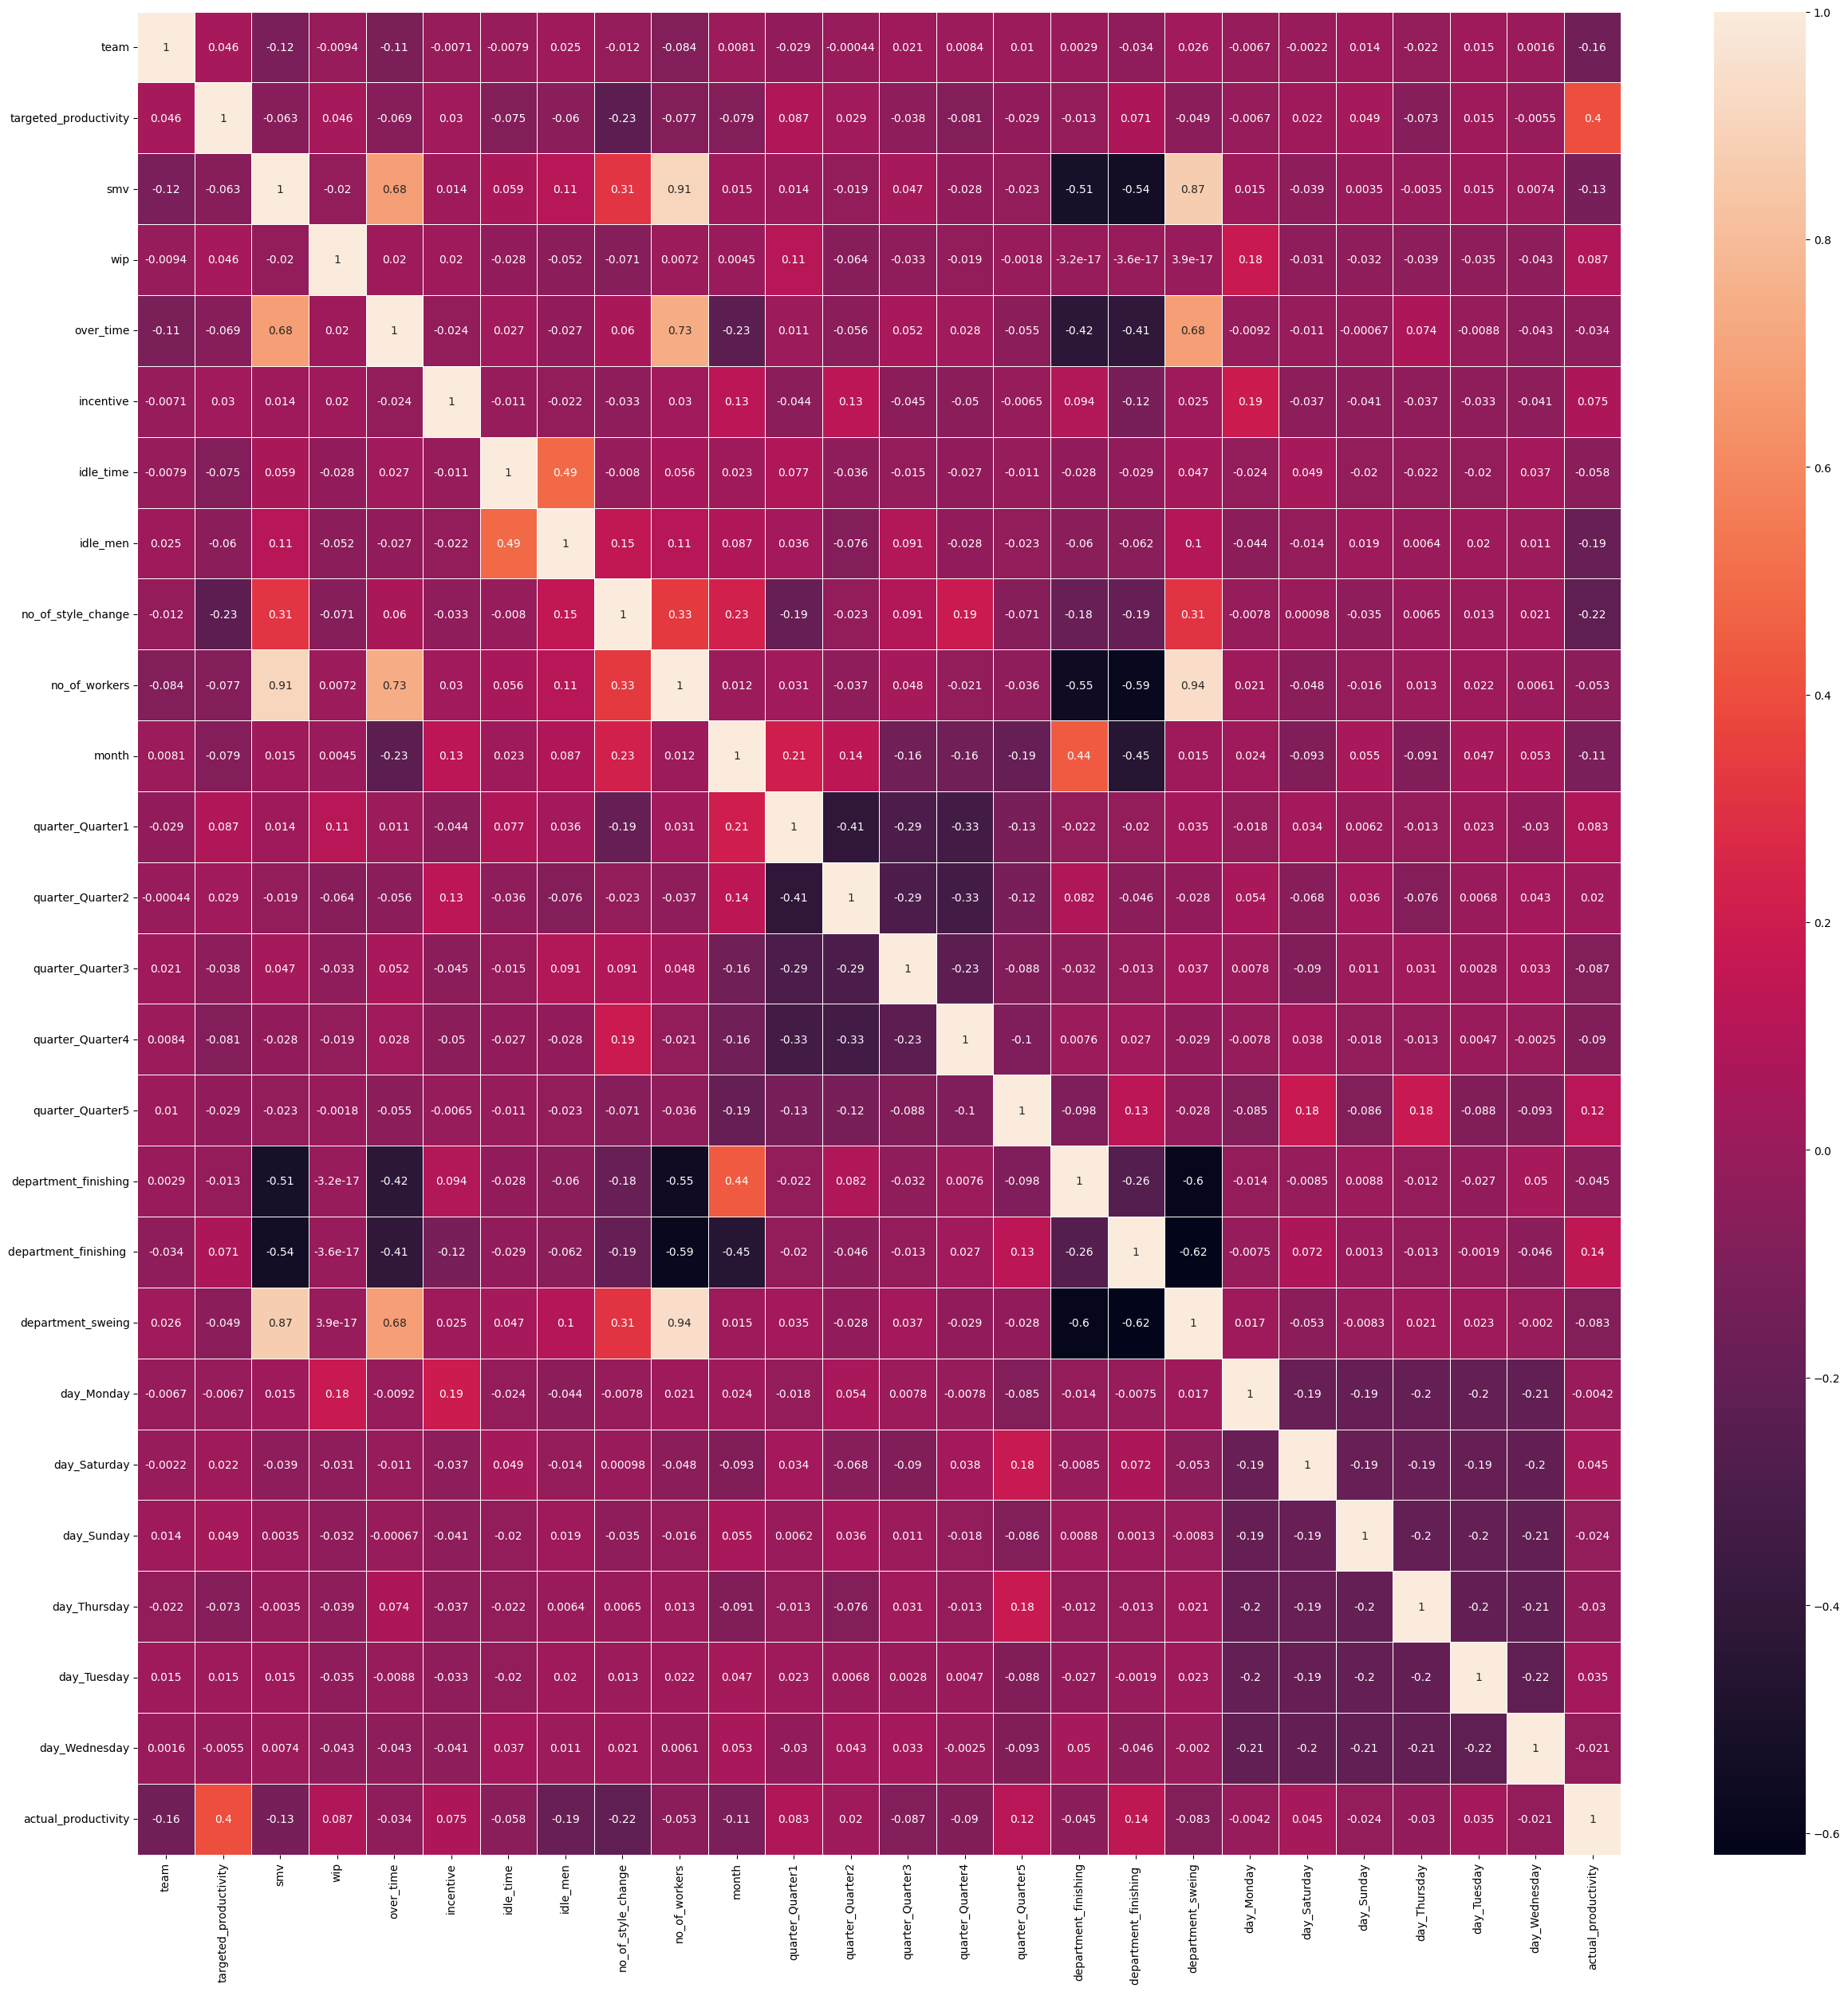

In [352]:
corrMatrix = df_train.corr()
fig, ax = plt.subplots(figsize=(30,30)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

From correlation, it was found that the following association:-

 department_sweing & no_of_workers  > no_of_workers & smv  > no_of_workers & over_time > over_time & smv > department_sweing & over_time  > idle_men & idle_time  > month & department_finishing  > department_finishing &  month  

In [353]:

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corrMatrix.unstack().sort_values()
pd.set_option('display.max_rows', None) 
sorted_mat.tail(100)


actual_productivity    quarter_Quarter1        0.08
quarter_Quarter1       actual_productivity     0.08
month                  idle_men                0.09
idle_men               month                   0.09
quarter_Quarter1       targeted_productivity   0.09
targeted_productivity  quarter_Quarter1        0.09
actual_productivity    wip                     0.09
wip                    actual_productivity     0.09
idle_men               quarter_Quarter3        0.09
quarter_Quarter3       idle_men                0.09
no_of_style_change     quarter_Quarter3        0.09
quarter_Quarter3       no_of_style_change      0.09
department_finishing   incentive               0.09
incentive              department_finishing    0.09
idle_men               department_sweing       0.10
department_sweing      idle_men                0.10
wip                    quarter_Quarter1        0.11
quarter_Quarter1       wip                     0.11
idle_men               no_of_workers           0.11
no_of_worker

Checking for Testing Dataset

In [354]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   180 non-null    int64  
 1   targeted_productivity  180 non-null    float64
 2   smv                    180 non-null    float64
 3   wip                    97 non-null     float64
 4   over_time              180 non-null    int64  
 5   incentive              180 non-null    int64  
 6   idle_time              180 non-null    float64
 7   idle_men               180 non-null    int64  
 8   no_of_style_change     180 non-null    int64  
 9   no_of_workers          180 non-null    float64
 10  month                  180 non-null    int64  
 11  quarter_Quarter1       180 non-null    int64  
 12  quarter_Quarter2       180 non-null    int64  
 13  quarter_Quarter3       180 non-null    int64  
 14  quarter_Quarter4       180 non-null    int64  
 15  quarte

In [355]:
df_test.isnull().sum()

team                      0
targeted_productivity     0
smv                       0
wip                      83
over_time                 0
incentive                 0
idle_time                 0
idle_men                  0
no_of_style_change        0
no_of_workers             0
month                     0
quarter_Quarter1          0
quarter_Quarter2          0
quarter_Quarter3          0
quarter_Quarter4          0
quarter_Quarter5          0
department_finishing      0
department_finishing      0
department_sweing         0
day_Monday                0
day_Saturday              0
day_Sunday                0
day_Thursday              0
day_Tuesday               0
day_Wednesday             0
dtype: int64

In [356]:
df_test["wip"]=df_train["wip"].fillna(df_train["wip"].mean()) 

EDA

In [357]:
df_train.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'actual_productivity'],
      dtype='object')

In [358]:
df_train['no_of_style_change'].nunique()

3

In [359]:
df_train['over_time'].nunique()

137

<AxesSubplot:xlabel='actual_productivity', ylabel='Count'>

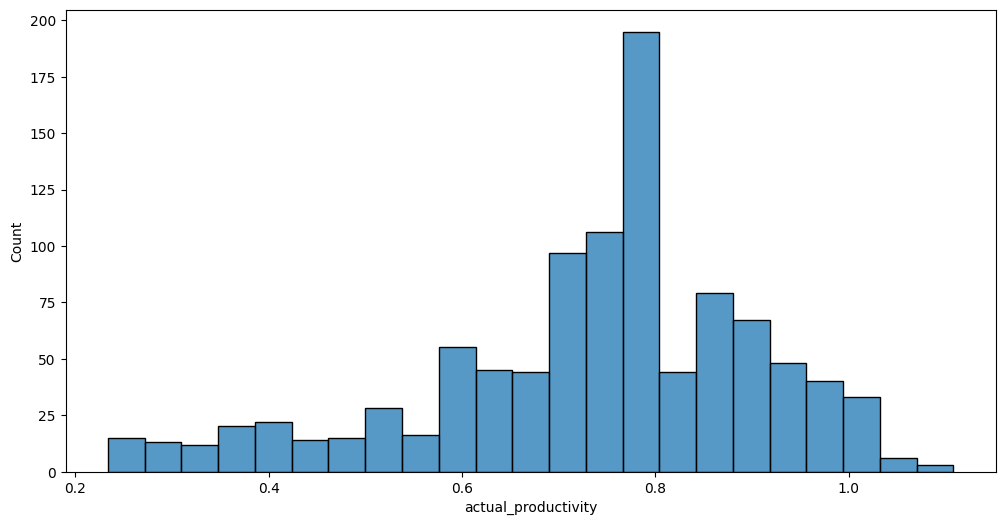

In [360]:
# Actual productivity ki range dekhny k liye k kahan se kahan tk lie krti h productivity
sns.histplot(df_train['actual_productivity'], kde=False)

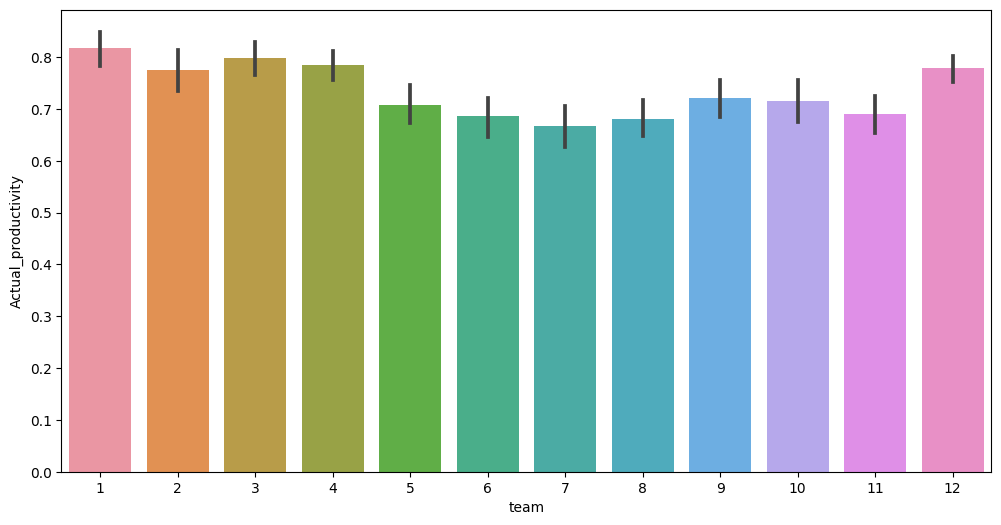

In [361]:
# hr team ki productivity kitni h
# is case m sb se zada productive team number 12 h
plt.rcParams["figure.figsize"] = (12,6)
sns.barplot(df_train,x='team', y='actual_productivity')
plt.xlabel("team")
plt.ylabel("Actual_productivity")
plt.show()

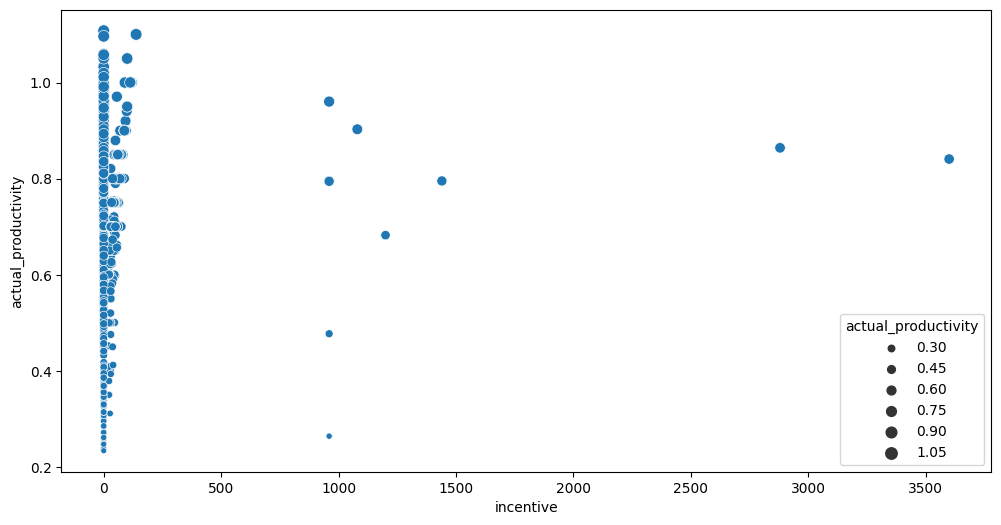

In [362]:
# To check if productivity increases as 'incentives' are increased
plt.rcParams["figure.figsize"] = (12,6)
sns.scatterplot(df_train, x='incentive', y='actual_productivity', size='actual_productivity')
sns.color_palette(palette='pastel', n_colors=None, desat=None, as_cmap=False)
plt.show()

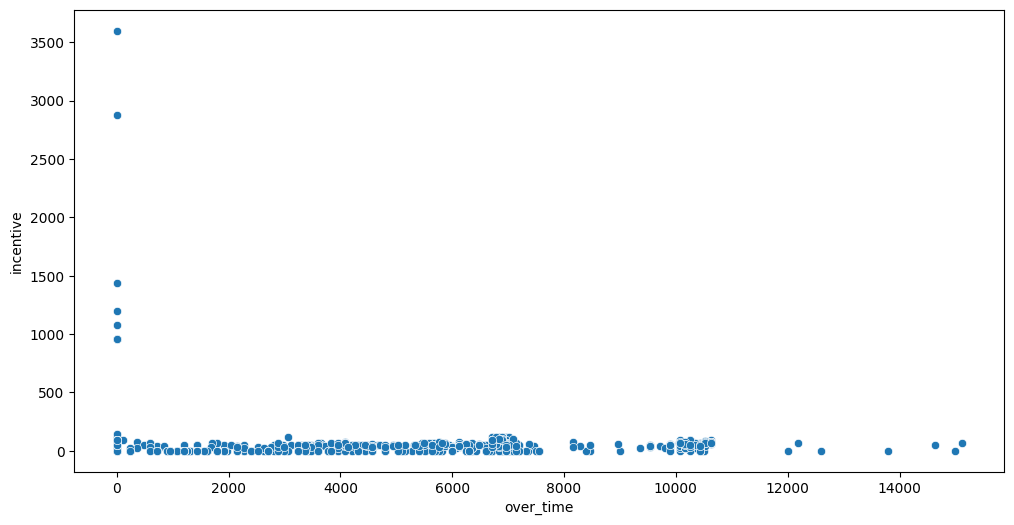

In [363]:
# kitna overtime lgany pr kitna incentive diya gya employees ko
plt.rcParams["figure.figsize"] = (12,6)
sns.scatterplot(df, x='over_time', y='incentive')
plt.show()

### Spliting the Training Dataset into Features and Labels

In [364]:
X= df_train.iloc[:,:-1]
y = df_train["actual_productivity"]

In [365]:
X.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,9,0.75,3.94,1183.18,960,0,0.00,0,0,8.00,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,7,0.65,30.10,909.00,7080,0,0.00,0,1,59.00,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,3,0.80,4.15,1183.18,1440,0,0.00,0,0,7.00,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0.65,22.53,762.00,5040,0,0.00,0,1,42.00,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,4,0.70,30.10,767.00,3300,50,0.00,0,1,57.00,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [366]:
y.head()

0   0.76
1   0.54
2   0.82
3   0.58
4   0.79
Name: actual_productivity, dtype: float64

### Appling Multiple Model

In [367]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
rfr = RandomForestRegressor()
svr = SVR()

#LazyRegressor
Gr = GradientBoostingRegressor()
Hgr = HistGradientBoostingRegressor()
Ada = AdaBoostRegressor()
xbgi = xgb.XGBRegressor
#Lgbmr = lgbm.LGBMRegressor




In [368]:
X.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64

We Observe that 423 missing values in wip (Work In Progress) 👆
Replacinig the missing values with mean

In [369]:
df_train["wip"]=df_train["wip"].fillna(df_train["wip"].mean()) 

In [370]:
df_train.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
actual_productivity      0
dtype: int64

In [371]:
df_test.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64

In [372]:
df_test["wip"]=df_test["wip"].fillna(df_test["wip"].mean()) 

In [373]:
df_test.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64

### LinearRegression

In [406]:
X= df_train.iloc[:,:-1]
y = df_train["actual_productivity"]

lr = LinearRegression()
lr.fit(X,y)
y_pred_lr= lr.predict(X)

### Desicison Tree

In [405]:
dtr.fit(X,y)
y_pred_dtr = dtr.predict(X)


### random forest regression

In [404]:
rfr.fit(X,y)
y_pred_rfr = rfr.predict(X)


### Support Vector Regression (SVR)

In [407]:
svr.fit(X,y)
y_pred_svr= svr.predict(X)

### Voting Classifier

In [378]:
from sklearn.ensemble import VotingRegressor
voting_clf = VotingRegressor([
                         ('lr', lr),('knr', knr), ('dtr', dtr),('rfr',rfr),('svr',svr)
                         ])

In [379]:
voting_clf.fit(X,y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('knr', KNeighborsRegressor()),
                            ('dtr', DecisionTreeRegressor()),
                            ('rfr', RandomForestRegressor()), ('svr', SVR())])

In [410]:


lr.fit(X, y)
y_pred_lr = lr.predict(X)
Mslr =mean_squared_error(y_pred_lr, y)
print('Linear Regression',Mslr)

dtr.fit(X, y)
y_pred_dtr  = dtr.predict(X)
Msedtr =mean_squared_error(y_pred_dtr , y)
print('Desicison Tree',Msedtr)

rfr.fit(X, y)
y_pred_rfr =rfr.predict(X)
Msefr =mean_squared_error(y_pred_rfr , y)
print('random forest regression',Msefr)

svr.fit(X, y)
y_pred_svr =svr.predict(X)
Msesvr =mean_squared_error(y_pred_svr , y)
print('Support Vector Regression (SVR)',Msesvr)



Linear Regression 0.02094504591376525
Desicison Tree 3.042098193376259e-33
random forest regression 0.0021508793128175944
Support Vector Regression (SVR) 0.028574282530029742


In [397]:
from sklearn.metrics import mean_squared_error  ,r2_score
for clf in (lr,knr, dtr,rfr,svr ):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, mean_squared_error(y_pred, y))

LinearRegression 0.02094504591376525
KNeighborsRegressor 0.016849722870148895
DecisionTreeRegressor 3.042098193376259e-33
RandomForestRegressor 0.0021548988073383803
SVR 0.028574282530029742


In [398]:
from sklearn.metrics import mean_squared_error  ,r2_score
for clf in (lr,knr, dtr,rfr,svr ):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, r2_score(y_pred, y))

LinearRegression -1.2265606807967981
KNeighborsRegressor -0.33338838704006135
DecisionTreeRegressor 1.0
RandomForestRegressor 0.9044965832714937
SVR -14.86104077007237


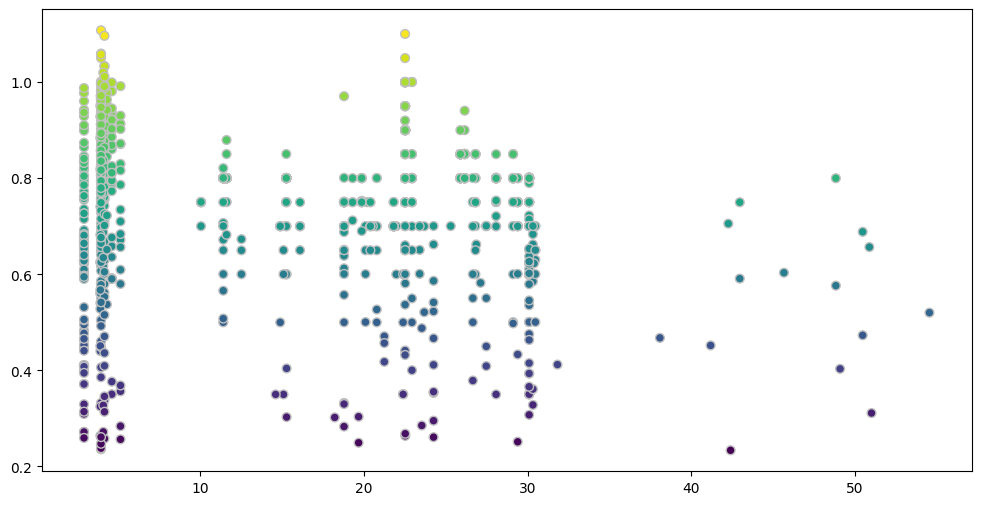

In [382]:
plt.scatter(x=X['smv'], y=y, c=y,s=40, edgecolors='silver')

In [383]:
from lazypredict.Supervised import LazyRegressor

In [384]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [385]:
clf = LazyRegressor(verbose=0)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [01:48<00:00,  2.58s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.28,0.37,0.14,1.48
HistGradientBoostingRegressor,0.23,0.33,0.15,4.29
LGBMRegressor,0.22,0.31,0.15,6.03
RandomForestRegressor,0.20,0.30,0.15,2.27
AdaBoostRegressor,0.16,0.27,0.16,0.45
ExtraTreesRegressor,0.15,0.25,0.16,2.18
BaggingRegressor,0.14,0.24,0.16,0.50
XGBRegressor,0.06,0.17,0.17,0.96
NuSVR,0.06,0.17,0.17,0.49


### Voting Regressor on below Alogs 

In [386]:
from sklearn.ensemble import VotingRegressor
voting_clf = VotingRegressor([
                        ('knr', knr), ('Gr', Gr),('Hgr', Hgr), ('Ada', Ada)])

In [387]:
voting_clf.fit(X,y)

VotingRegressor(estimators=[('knr', KNeighborsRegressor()),
                            ('Gr', GradientBoostingRegressor()),
                            ('Hgr', HistGradientBoostingRegressor()),
                            ('Ada', AdaBoostRegressor())])

 ### Mean Squared Error and R Squared Error

In [388]:
from sklearn.metrics import mean_squared_error , r2_score

print("GradientBoostingRegressor")
Gr.fit(X, y)
y_pred = Gr.predict(X)
MSEGr=mean_squared_error(y_pred, y)
print('MSE for GradientBoostingRegressor	: ', MSEGr)
R2Gr=r2_score(y_pred, y)
print('R2 for GradientBoostingRegressor	: ', R2Gr)


print(" HistGradientBoostingRegressor")
Hgr.fit(X, y)
y_pred = Hgr.predict(X)
MSEHGr=mean_squared_error(y_pred, y)
print('MSE HistGradientBoostingRegressor	: ', MSEHGr)
R2HGr=r2_score(y_pred, y)
print('R2 for HistGradientBoostingRegressor	: ', R2HGr)

print('AdaBoostRegressor')
Ada.fit(X, y)
y_pred = Ada.predict(X)
MSEada=mean_squared_error(y_pred, y)
print('MSE for AdaBoostRegressor	: ', MSEada)
R2ada=r2_score(y_pred, y)
print('R2 for AdaBoostRegressor	: ', R2ada)

print('KNeighborsRegressor')
knr.fit(X, y)
y_pred = knr.predict(X)
MSEknr=mean_squared_error(y_pred, y)
print('MSE for KNeighborsRegressor: ', MSEknr)
R2knr=r2_score(y_pred, y)
print('R2 for KNeighborsRegressor: ', R2knr)


GradientBoostingRegressor
MSE for GradientBoostingRegressor	:  0.009968464773837726
R2 for GradientBoostingRegressor	:  0.40081288774684987
 HistGradientBoostingRegressor
MSE HistGradientBoostingRegressor	:  0.005142214241329054
R2 for HistGradientBoostingRegressor	:  0.7550591906283303
AdaBoostRegressor
MSE for AdaBoostRegressor	:  0.017438528404551047
R2 for AdaBoostRegressor	:  -0.8651868663348383
KNeighborsRegressor
MSE for KNeighborsRegressor:  0.016849722870148895
R2 for KNeighborsRegressor:  -0.33338838704006135


### XGBRegressor

In [389]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X, y)
 
# Predict the model
pred = xgb_r.predict(X)
 
# RMSE Computation
xgbmse = mean_squared_error(y, pred)
xgbrsqure = r2_score(y, pred)
print("MSE through XGB : % f" %(mse))
print("rsqure through XGB :" ,(xgbrsqure))

[19:24:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MSE through XGB :  0.028276
rsqure through XGB : 0.7803255374455028


### LGBMRegressor	

In [390]:
# laoding data
lgb_train = lgb.Dataset(X, y)
lgb_eval = lgb.Dataset(X, y, reference=lgb_train) 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
} 
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)


[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l1: 0.127922	valid_0's l2: 0.0282535
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 0.122034	valid_0's l2: 0.0263989
[3]	valid_0's l1: 0.117153	valid_0's l2: 0.024942
[4]	valid_0's l1: 0.112736	valid_0's l2: 0.0235107
[5]	valid_0's l1: 0.108789	valid_0's l2: 0.0222592
[6]	valid_0's l1: 0.105522	valid_0's l2: 0.0212824
[7]	valid_0's l1: 0.102278	valid_0's l2: 0.0204109
[8]	valid_0's l1: 0.0984187	valid_0's l2: 0.0192975
[9]	valid_0's l1: 0.0963369	valid_0's l2: 0.0186523
[10]	valid_0's l1: 0.0934049	valid_0's l2: 0.0178066
[11]	valid_0's l1: 0.0917797	valid_0's l2: 0.0173144
[12]	valid_0's l1: 0.0893338	valid_0's l2: 0.016696
[13]	valid_0's l1: 0.0871029	valid_0's l2: 0.0161097
[14]	valid_0's l1: 0.0852937	valid_0's l2: 0.0156372
[15]	valid_0's l1: 0.0838521	valid_0's l2: 0.0152506
[16]	valid_0's l1: 0.0826386	valid_0's l2: 0.0149532
[17]	valid_0's l1: 0.0817139	valid_0's l2: 0.0146534
[1

In [391]:
# prediction
y_pred = model.predict(X)

# accuracy check
LGBmse = mean_squared_error(y, y_pred)
LGBrmse = mse**(0.5)
LGBrsquare = r2_score(y, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
print("R Square for LGBMRegressor	:" , LGBrsquare) 

MSE: 0.03
RMSE: 0.17
R Square for LGBMRegressor	: 0.7052952709945355


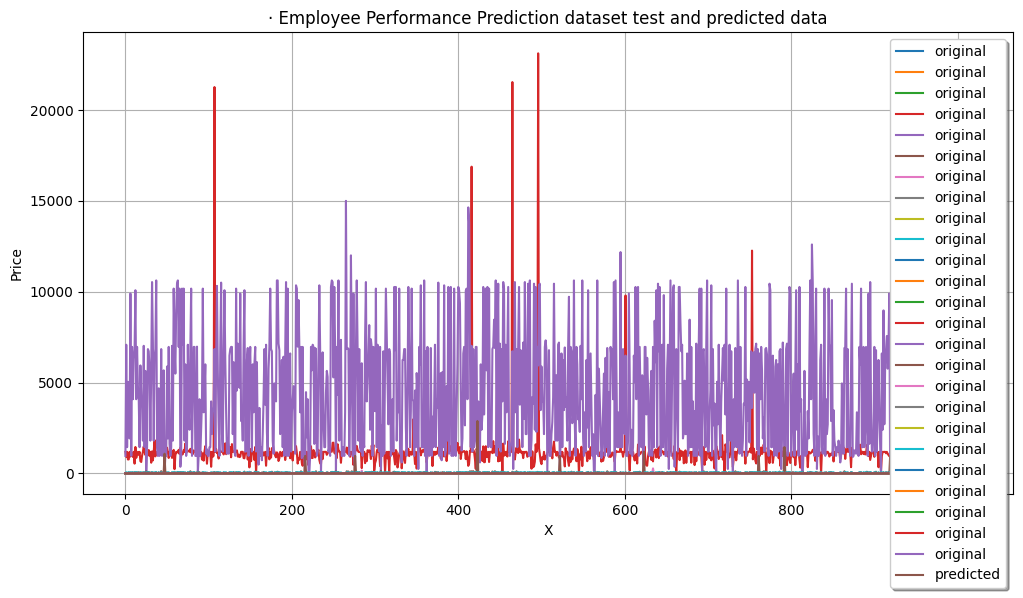

In [392]:
# visualizing in a plot
x_ax = range(len(y))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, X, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("· Employee Performance Prediction dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [393]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Regressor','Ada Boost Regressor','Gradient Boosting Regressor','hist gradient Boosting Regressor', 'XgBoost','LGBM'],
    'R2Score' : [R2knr, R2ada, R2Gr, R2HGr, xgbrsqure, LGBrsquare],
    "Mean Square Error":[MSEknr,MSEada,MSEGr,MSEHGr,xgbmse,LGBmse]
})


models.sort_values(by = 'R2Score', ascending = False) 

,Model,R2Score,Mean Square Error
4,XgBoost,0.78,0.01
3,hist gradient Boosting Regressor,0.76,0.01
5,LGBM,0.71,0.01
2,Gradient Boosting Regressor,0.40,0.01
0,Random Forest Regressor,-0.33,0.02
1,Ada Boost Regressor,-0.87,0.02


In [394]:
import plotly.express as px
px.bar(data_frame= models, x = 'R2Score', y = 'Model', color = 'Mean Square Error', template = 'plotly_dark', title = 'Models Comparison')

<Figure size 1000x800 with 0 Axes>

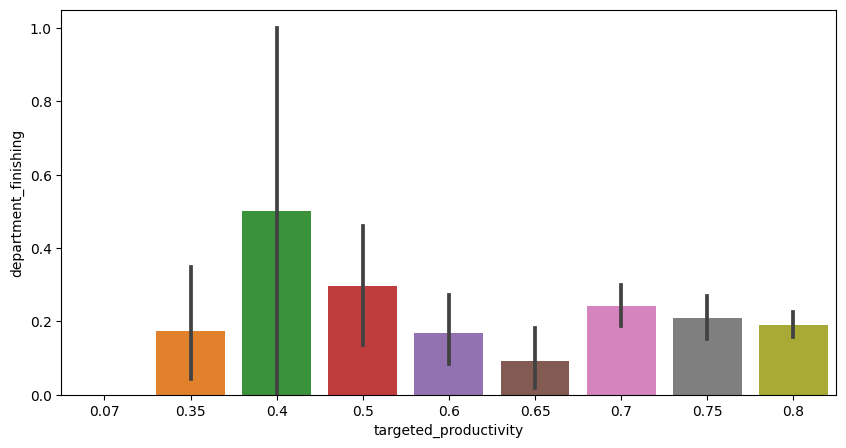

In [395]:
df=df_train
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(10,8))
plt.figure(figsize=(10,5))

sns.barplot(df_train, x='targeted_productivity', y='department_finishing' )
plt.show()
